<a href="https://colab.research.google.com/github/pedroAndrad1/introducao_a_machine_learning/blob/master/introducao_ml_parte3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Aqui vamos de novo importar um dataset e criar um estimador para ele. Também vamos criar uma coluna a mais no dataset para nos auxiliar a ver a curva de decisão do modelo. Além disso, vamos plotar as estimativas do modelo em um gráfico para vermos sua curva de decisão. Também será abordado o conceito de baseline.

#1 Importar o dataset e renomear o cabeçalho

In [0]:
import pandas as pd

uri = "https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv"
dados = pd.read_csv(uri)

a_renomear = {
    'expected_hours' : 'horas_esperadas',
    'price' : 'preco',
    'unfinished' : 'nao_finalizado'
}
dados = dados.rename(columns = a_renomear)
dados.head()

,nao_finalizado,horas_esperadas,preco
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


# 2 Criar uma nova coluna que será o contrário da coluna horas_esperadas. Isso será usado mais tarde para comparar as decisões do modelo.

In [0]:
#Primeiro eu crio um dicionario
troca = {
    0 : 1,
    1 : 0
}
#Depois eu uso a funcao map na coluna de nao_finalizado e remapeio de acordo com o dicionario.
#A funcao vai me retornar uma nova coluna e eu armazeno esses valores na coluna finalizado que acabei de criar.
dados['finalizado'] = dados.nao_finalizado.map(troca)
dados.head()

,nao_finalizado,horas_esperadas,preco,finalizado
0,1,26,192,0
1,1,88,9015,0
2,1,89,2577,0
3,1,42,275,0
4,1,39,170,0


# 3 Criar o modelo e fazer as estimativas e comparar com o baseline. 

O base line, é um algoritmo que alcança uma acurácia mínima que nosso modelo de ser capaz de melhorar bastante.  Aqui o algoritmo de baseline será apenas estimar que todas as estimativas foram iguais a 1. Parece bobo, mas veremos que nosso modelo não será muito melhor do que isso

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

SEED = 20

x = dados[["horas_esperadas", "preco"]]
y = dados["nao_finalizado"]

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y,
                                                         random_state = SEED, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))


# O linearSVC tambem usa uma SEED na proprieadade random_state para calcular a constante da funcao de decisao.
#Como no perceptron, ele so resolve bem problemas linearmente separaveis.
#Nao li a documentacao, mas acredito que funcione muito parecido como o perceptron.
modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

#Usando a biblioteca numpy, eu crio uma matriz de 540 1's que representam todas as estimativas do modelo.
import numpy as np
previsoes_de_base = np.ones(540)
acuracia = accuracy_score(teste_y, previsoes_de_base) * 100
print("A acurácia do baseline foi %.2f%%" % acuracia)

Treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia foi 58.70%
A acurácia do baseline foi 47.41%


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


#4 plotando as estimativas em um grafico

Aqui vamos usar a biblioteca seaborn


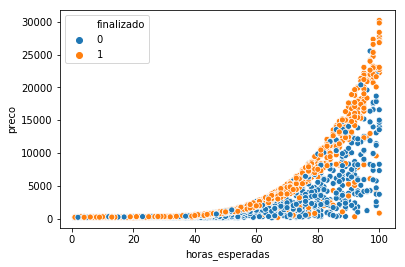

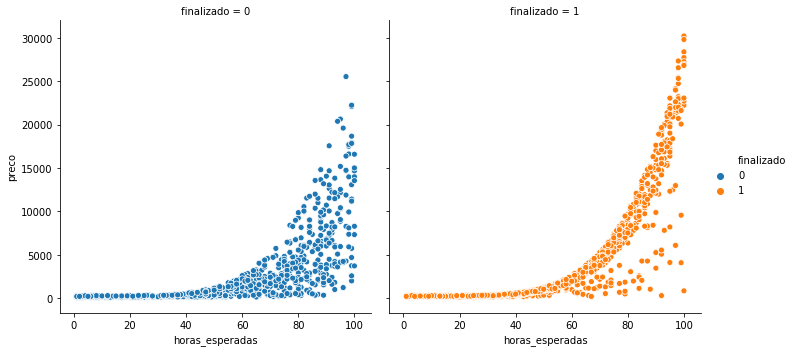

In [0]:
import seaborn as sns

#Na funcao scatterplot, passamos como parametro quais dados serão o eixo x, quais dados serão o eixo y, o dataset e a diferenciacam. 
#Essa diferenciam seria o hue, entao passamos a coluna de finalizado. Que é composta por 0 e 1. Entao, se for 0 ele coloca de uma cor
#Se for 1, colococa o ponto de outra.
sns.scatterplot(x="horas_esperadas", y="preco", hue="finalizado", data=dados)

#Tambem podemos usar a funcao relplot(), passando a propriedade col = finalizados para seperar em dois graficos de acordo com a classe finalizado.
#Ou seja, um grafico para 0's e um grafico para 1's.

sns.relplot(x="horas_esperadas", y="preco", hue="finalizado", data=dados, col ="finalizado" )

#5 Curva de decisão

Para analisarmos a curva decisao. Temos que fazer o modelo fazer uma estimativa para todos os possiveis pontos.

A explicação mais detalhada de como fazer isso, está nesse link:
https://cursos.alura.com.br/course/machine-learning-introducao-a-classificacao-com-sklearn/task/46780

Caso tenha uma conta alura.


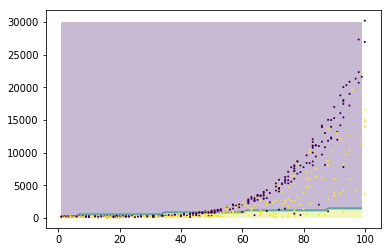

In [0]:
x_min = teste_x.horas_esperadas.min()
x_max = teste_x.horas_esperadas.max()
y_min = teste_x.preco.min()
y_max = teste_x.preco.max()

pixels = 100
np.arange(x_min, x_max, (x_max - x_min)/pixels)

eixo_x = np.arange(x_min, x_max, (x_max - x_min)/ pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min)/ pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)

pontos = np.c_[xx.ravel(), yy.ravel()]

Z = modelo.predict(pontos)

Z = Z.reshape(xx.shape)

import matplotlib.pyplot as plt

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(teste_x.horas_esperadas, teste_x.preco, c=teste_y, s=1)